# Support points with Weighted Likelihood Bootstrap

_____

# 0. Setup

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pdb
from scipy.spatial.distance import pdist
import sys
import tensorflow as tf
import time

from sp_utils import (
    get_support_points,
    scatter_and_hist,
    eval_uncertainty)

plt.style.use('ggplot')
print(sys.version)
print(tf.__version__)

3.7.1 (default, Nov 28 2018, 11:55:14) 
[Clang 9.0.0 (clang-900.0.39.2)]
1.13.1


____

# 1. Global Config

In [2]:
# Set global constants.          # main1()
IS_TF = True                     # Boolean. Use TensorFlow rather than analytical gradients.
DATA_SOURCE = 'balog'            # ['balog', 'gaussian', 'gamma', 'beta']
MAX_ITER = 301                   # Num iterations in each support point optimization. [301]
LR = 0.01                        # Energy optimization learning rate. [1e-2]

ENERGY_POWER = 1.                # Power for energy distance kernel.
M = 200                          # Number of data points.
N = 20                           # Number of support points.
DIM = 2                          # Dimension of data.

___

# 2. Load and Plot Data

In [3]:
if DATA_SOURCE == 'balog':
    os.system('python data.py {} {}'.format(M, DIM))
    
    # Note that Balog's N is our M.
    DATA_PATH = '../data/mixture_of_Gaussians_N{}_D{}.npz'. format(M, DIM)

Loaded M=200 data points with dimension DIM=2


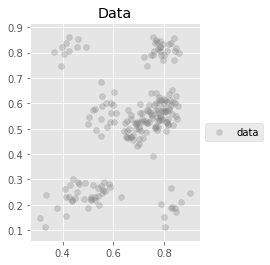

In [4]:
# Load data.
if DATA_SOURCE == 'balog':
    data = np.load(DATA_PATH)
    x = data['X_private']
    mus = data['MUS']
    weights = data['WEIGHTS']
    sigma_data = data['SIGMA_DATA']
    assert (M, DIM) == np.shape(x), 'Balog data dims do not match global params.'
    print('Loaded M={} data points with dimension DIM={}'.format(M, DIM))
    plt.scatter(x[:, 0], x[:, 1], c="gray", alpha=0.3,
                label='data')
    #plt.scatter(mus[:, 0], mus[:, 1], c='green', alpha=1, s=700*weights,
    #            label='true centroids')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Data')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

___

# 3. Run Support Point Optimization

is_tf: True, y_init: radial, clip: True, weights: False

  [*] Using TensorFlow optimization.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
  [*] Overall it/s: 0.0044


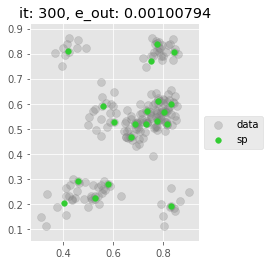

In [5]:
# Compute m support points on full set.
y_opt, e_opt = get_support_points(x, N, MAX_ITER, LR,
                                  is_tf=IS_TF, clip=True)

___

# 4. Sample many sets of support points with WLB

is_tf: True, y_init: radial, clip: True, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0044


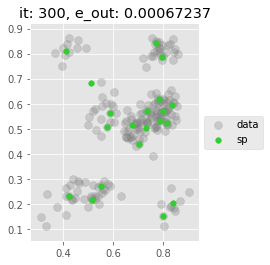

is_tf: True, y_init: radial, clip: True, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0046


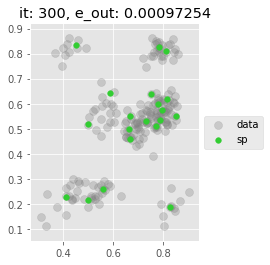

is_tf: True, y_init: radial, clip: True, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0044


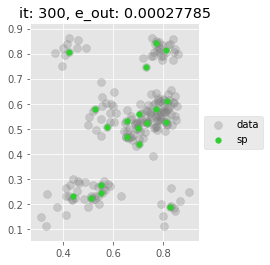

In [6]:
# Compute N support points from full set x.
num_samples = 3
y_opt_all = np.zeros((num_samples, N, DIM))

for i in range(num_samples):
    y_opt, e_opt = get_support_points(x, N, MAX_ITER, LR, is_tf=IS_TF,
                                      do_weights=True)
    y_opt_all[i] = y_opt

y_all = np.concatenate(y_opt_all, axis=0)

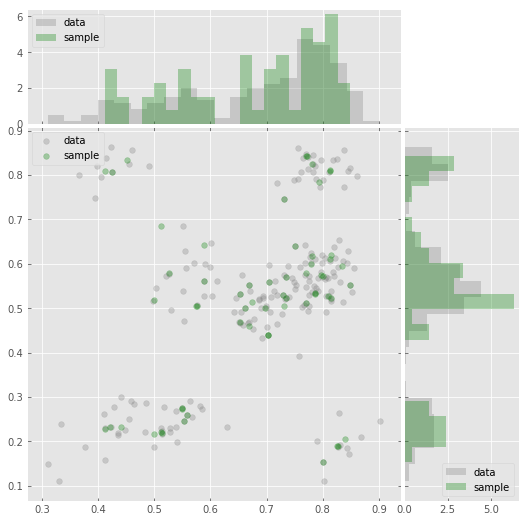

In [7]:
scatter_and_hist(x, y_all)

___

# 5. Uncertainty quantification.

$N(0, 1), Exp(1), Beta(2, 4)$

In [8]:
norm01_fn = lambda M: np.random.normal(loc=0, scale=1, size=(M, DIM))
exp1_fn = lambda M: np.random.exponential(scale=1, size=(M, DIM))
beta24_fn = lambda M: np.random.beta(a=2, b=4, size=(M, DIM))

M = 500
N = 20
LR = 1e-2
MAX_ITER = 300
num_draws = 25

Making samples of size 500
is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0305


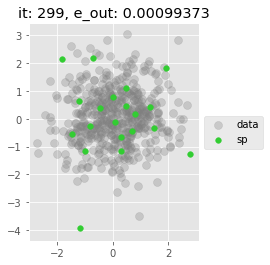

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0272


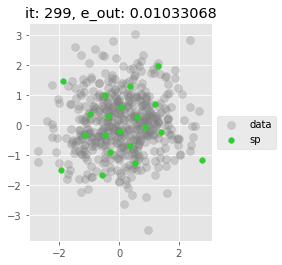

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0247


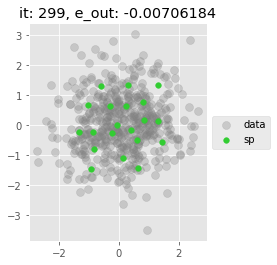

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0314


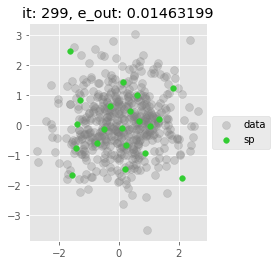

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0222


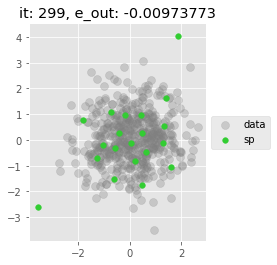

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0460


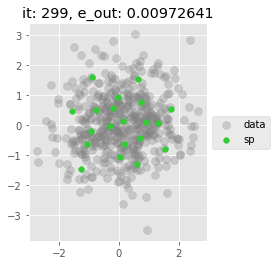

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0691


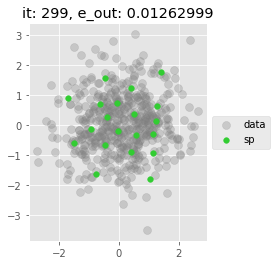

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0640


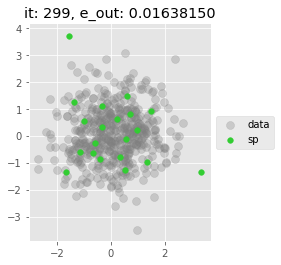

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0569


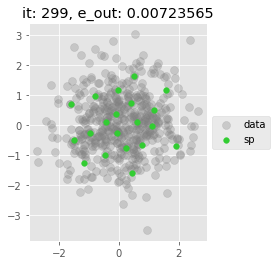

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0929


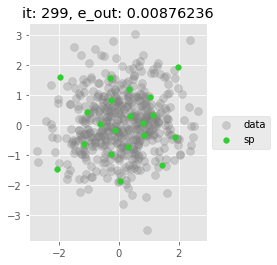

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0539


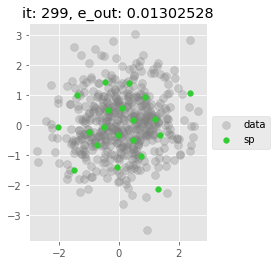

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0824


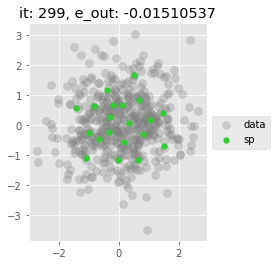

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0793


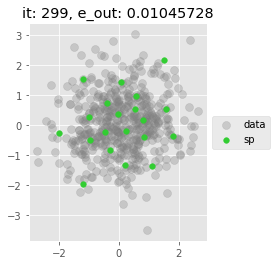

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0796


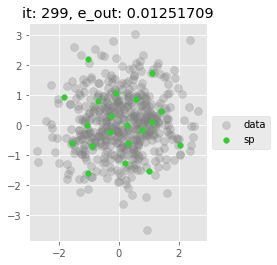

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0990


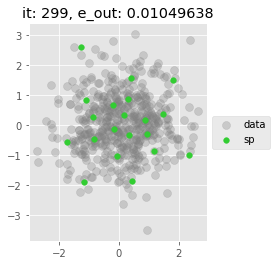

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0809


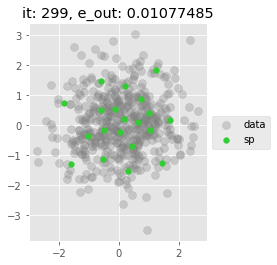

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0807


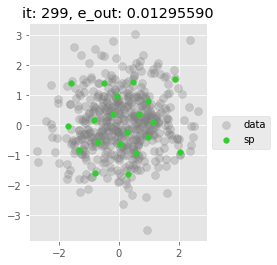

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.1030


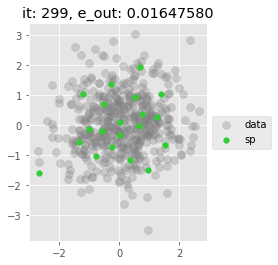

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0978


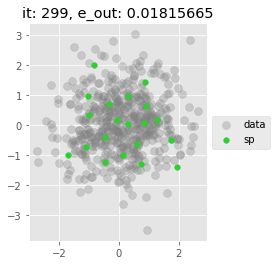

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0943


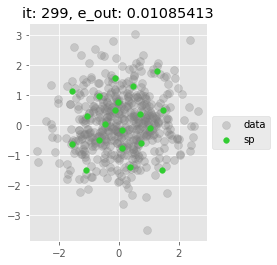

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0969


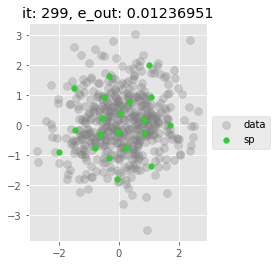

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0888


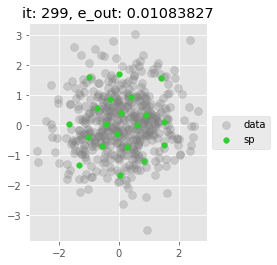

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0889


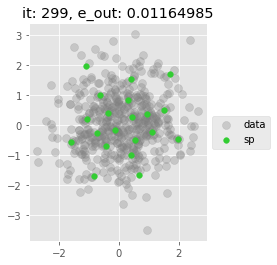

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.1122


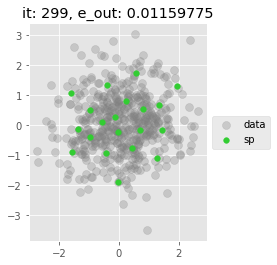

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0898


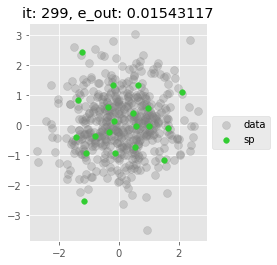

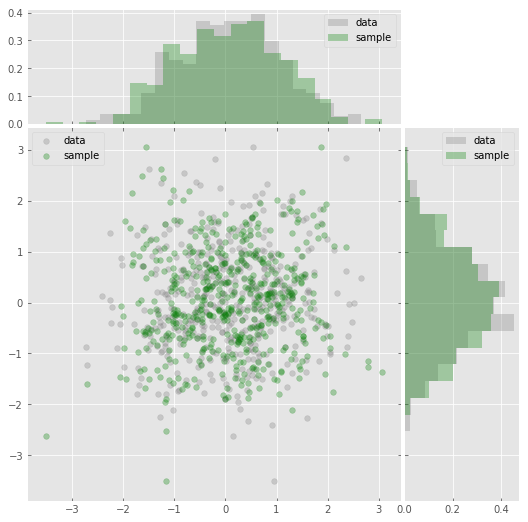

mean(x) = [0.08079897 0.04761454], mean(y) = [0.06558723 0.04434072]
cov(x) =
[[0.99558396 0.06847779]
 [0.06847779 0.98244322]]
cov(y_all) =
[[1.04059114 0.05686382]
 [0.05686382 0.99555491]]


In [9]:
print('Making samples of size {}'.format(N * num_draws))
eval_uncertainty(norm01_fn, M, N, DIM, LR, MAX_ITER, IS_TF, num_draws)

Making samples of size 500
is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0249


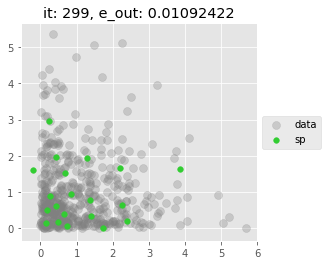

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0240


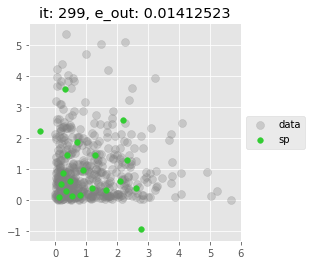

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0255


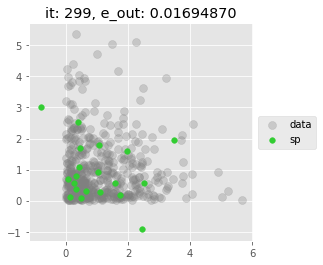

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0244


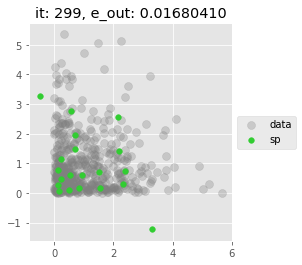

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0243


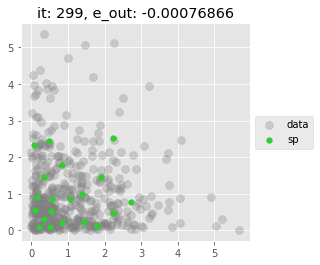

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0360


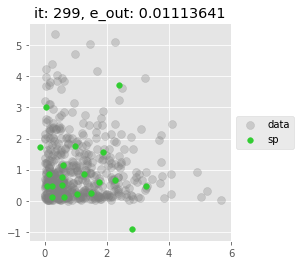

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0280


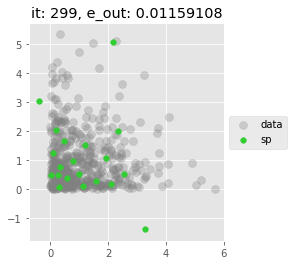

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0277


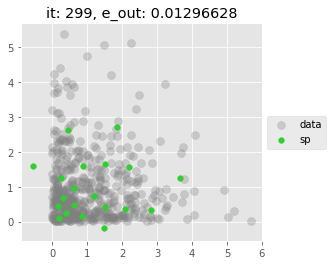

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0306


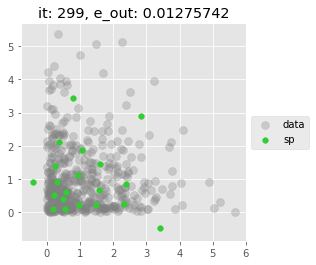

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0306


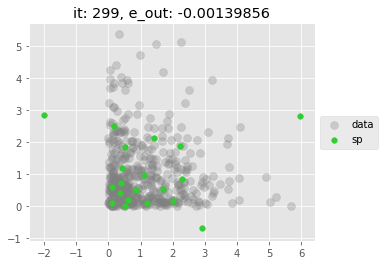

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0258


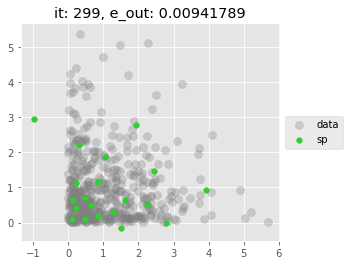

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0296


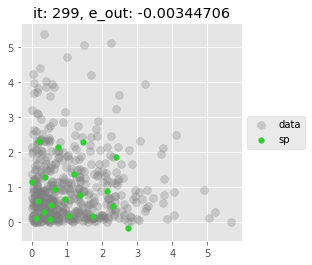

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0279


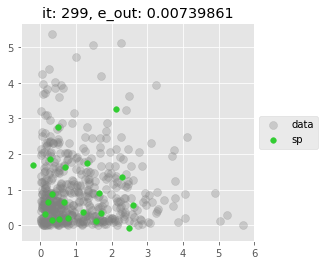

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0265


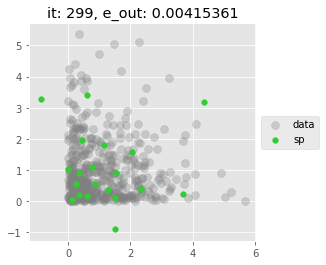

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0244


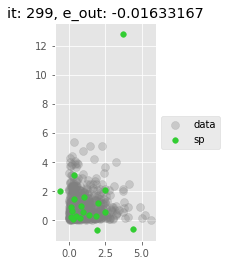

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0270


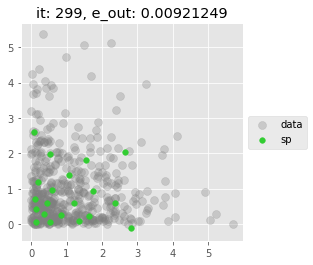

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0249


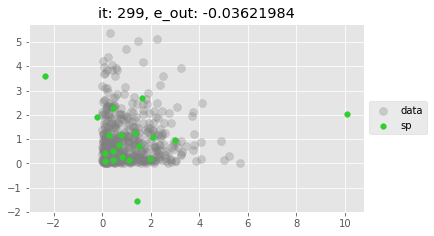

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0264


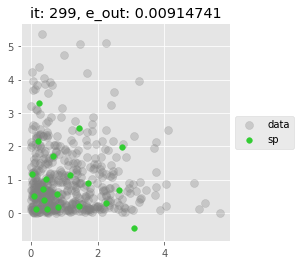

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0312


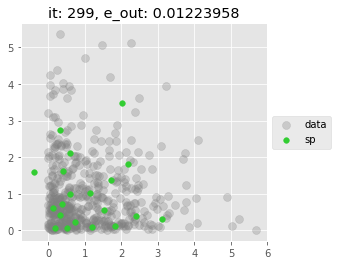

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0302


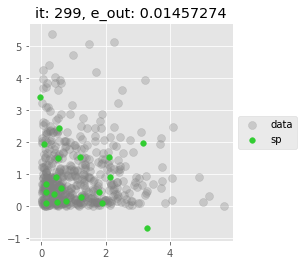

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0241


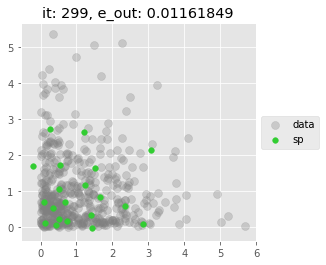

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0242


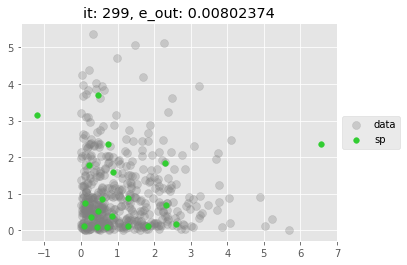

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0297


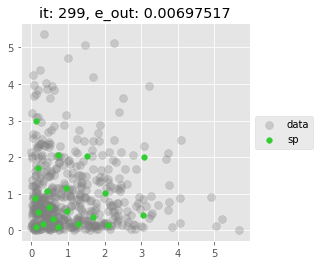

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0258


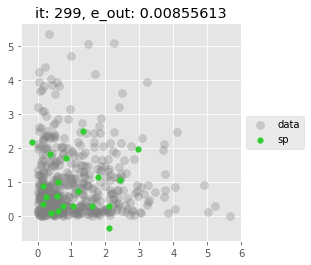

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0274


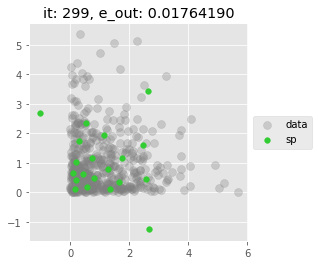

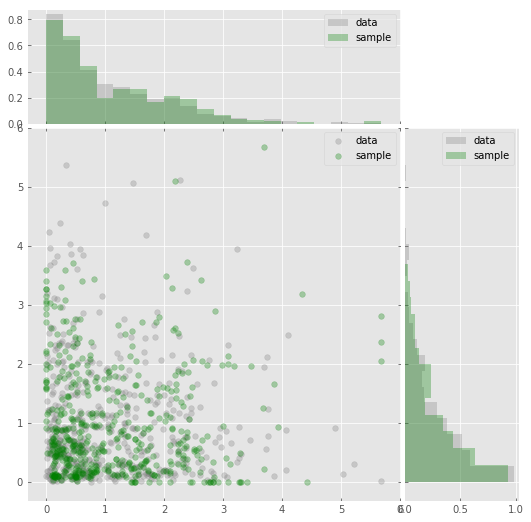

mean(x) = [1.06912435 0.98077546], mean(y) = [1.09864891 0.98795754]
cov(x) =
[[ 0.96405887 -0.04737593]
 [-0.04737593  0.94219914]]
cov(y_all) =
[[0.98552925 0.02359477]
 [0.02359477 0.86015049]]


In [11]:
print('Making samples of size {}'.format(N * num_draws))
eval_uncertainty(exp1_fn, M, N, DIM, 2e-2, MAX_ITER, IS_TF, num_draws)

Making samples of size 500
is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0333


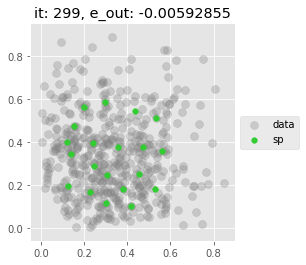

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0234


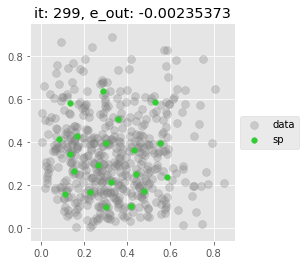

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0376


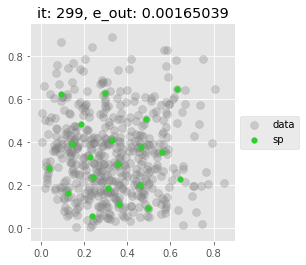

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0236


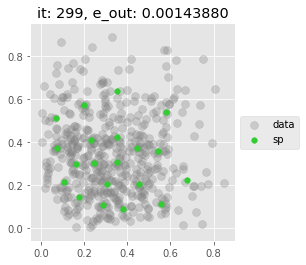

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0260


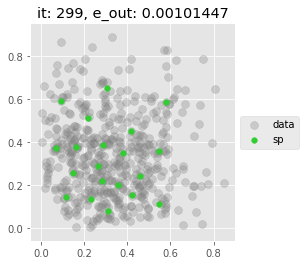

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0424


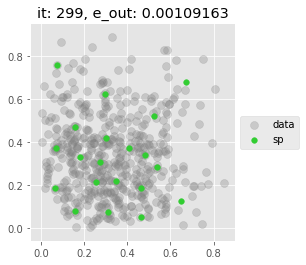

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0259


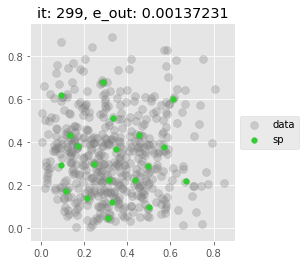

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0230


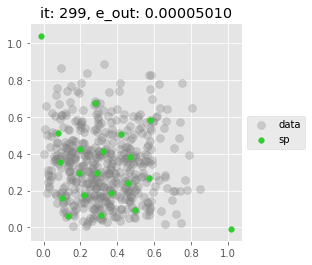

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0233


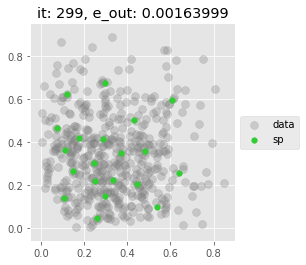

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0242


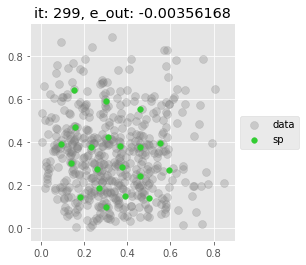

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0318


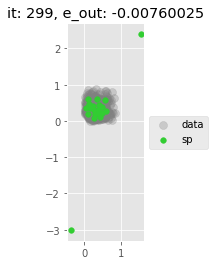

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0223


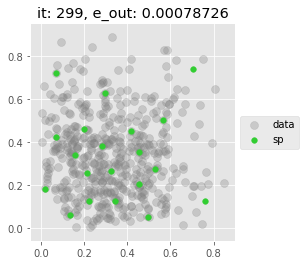

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0276


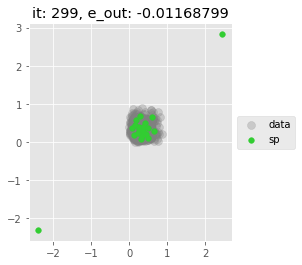

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0286


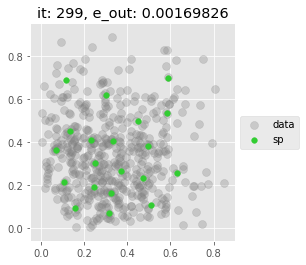

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0321


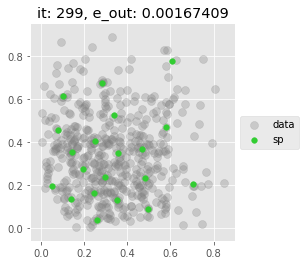

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0242


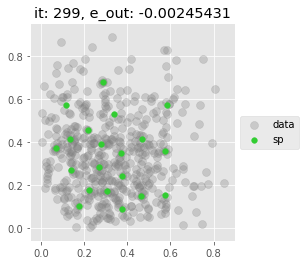

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0243


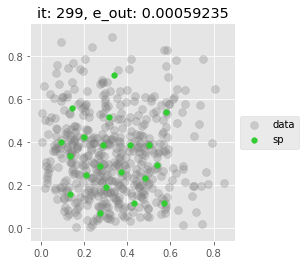

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0240


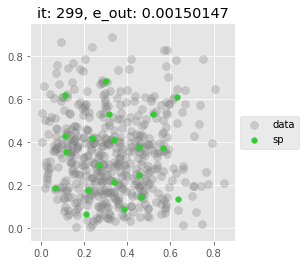

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0298


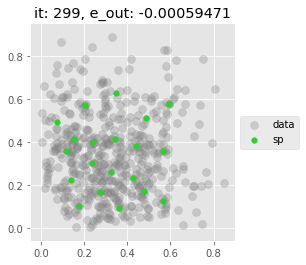

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0232


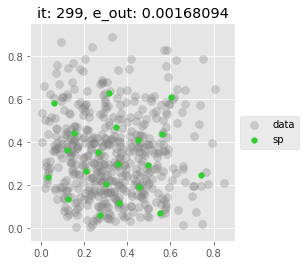

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0281


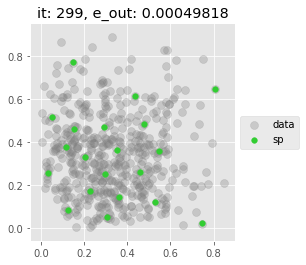

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0327


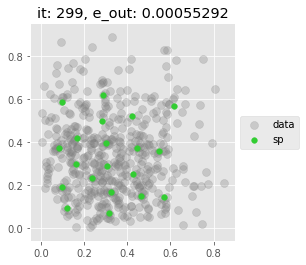

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0261


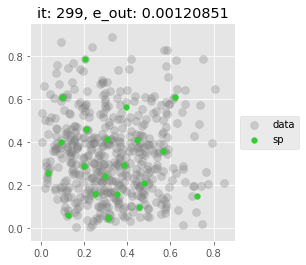

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0289


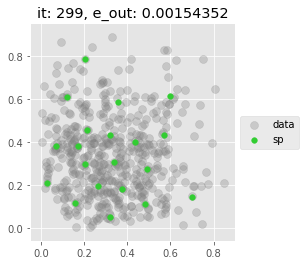

is_tf: True, y_init: random, clip: False, weights: True

  [*] Using TensorFlow optimization.
  [*] Overall it/s: 0.0303


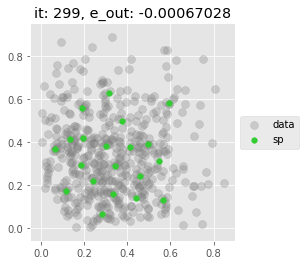

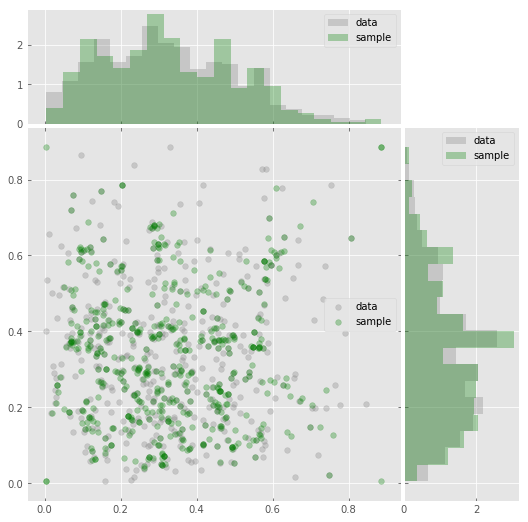

mean(x) = [0.32651255 0.3370855 ], mean(y) = [0.32714732 0.33464851]
cov(x) =
[[ 0.03122839 -0.00091665]
 [-0.00091665  0.03432431]]
cov(y_all) =
[[3.04595161e-02 7.49172579e-05]
 [7.49172579e-05 3.25308805e-02]]


In [12]:
print('Making samples of size {}'.format(N * num_draws))
eval_uncertainty(beta24_fn, M, N, DIM, 1e-2, MAX_ITER, IS_TF, num_draws)